In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
spotify_df = pd.read_csv('./final_data.csv')

In [11]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

def results(y, preds):
    print('Matrix confusion:')
    ConfusionMatrixDisplay.from_predictions( y, preds)
    plt.show()
    print('Classification report: \n',classification_report(y,preds,zero_division=True))
    print('Accuracy score: \n', accuracy_score(y, preds))
    print('Absolute error:\n',mean_absolute_error(y, preds))

In [12]:
spotify_df = drop_specific_cols(spotify_df, ['e_grammy', 'e_billboard'])


In [13]:
#variable to predict
y = spotify_df.e_spotify

In [14]:
#features
#we do not consider 'key' based on boxplot observation (title and artist name are not physical variables)
spotify_features = ['duration', 'end_of_fade_in', 'loudness', 'mode','start_of_fade_out', 'tempo', 'time_signature']
X = spotify_df[spotify_features]

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)

In [16]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_X, train_y)
rf_spotify_preds = forest_model.predict(val_X)

Matrix confusion:


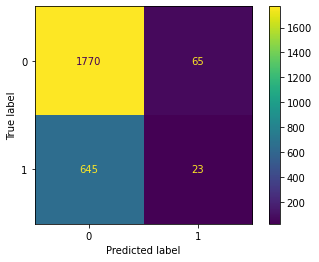

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83      1835
           1       0.26      0.03      0.06       668

    accuracy                           0.72      2503
   macro avg       0.50      0.50      0.45      2503
weighted avg       0.61      0.72      0.63      2503

Accuracy score: 
 0.7163403915301638
Absolute error:
 0.2836596084698362


In [17]:
results(val_y, rf_spotify_preds)

In [18]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [19]:
svm_model = SVC(kernel='sigmoid', random_state=1)
svm_model.fit(train_X, train_y)
svm_spotify_preds = svm_model.predict(val_X)

Matrix confusion:


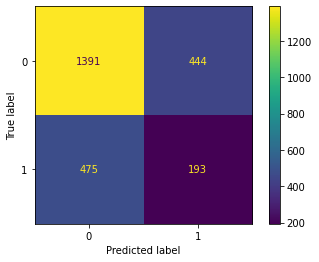

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      1835
           1       0.30      0.29      0.30       668

    accuracy                           0.63      2503
   macro avg       0.52      0.52      0.52      2503
weighted avg       0.63      0.63      0.63      2503

Accuracy score: 
 0.6328405912904514
Absolute error:
 0.36715940870954855


In [20]:
results(val_y, svm_spotify_preds)

In [21]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)
knn_spotify_preds = knn_model.predict(val_X)

Matrix confusion:


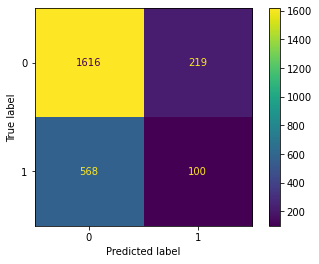

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.88      0.80      1835
           1       0.31      0.15      0.20       668

    accuracy                           0.69      2503
   macro avg       0.53      0.52      0.50      2503
weighted avg       0.63      0.69      0.64      2503

Accuracy score: 
 0.6855773072313224
Absolute error:
 0.31442269276867757


In [23]:
results(val_y, knn_spotify_preds)

In [24]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [37]:
logistic_model = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')
logistic_model.fit(train_X, train_y)
logistic_spotify_preds = logistic_model.predict(val_X)

Matrix confusion:


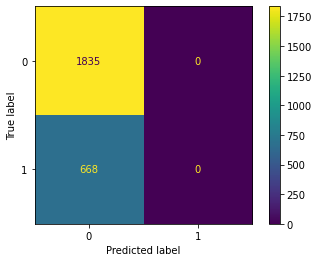

Classification report: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1835
           1       1.00      0.00      0.00       668

    accuracy                           0.73      2503
   macro avg       0.87      0.50      0.42      2503
weighted avg       0.80      0.73      0.62      2503

Accuracy score: 
 0.7331202556931682
Absolute error:
 0.2668797443068318


In [38]:
results(val_y, logistic_spotify_preds)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=5000000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=5000000)

Matrix confusion:


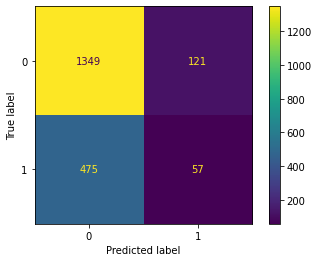

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      1470
           1       0.32      0.11      0.16       532

    accuracy                           0.70      2002
   macro avg       0.53      0.51      0.49      2002
weighted avg       0.63      0.70      0.64      2002

Accuracy score: 
 0.7022977022977023
Absolute error:
 0.2977022977022977


In [36]:
predictions = mlp.predict(X_test)
results(y_test, predictions)